Phase 1: Embracing the Data

This magical script embarks on the maiden voyage of a data odyssey, gracefully whisking away raw datasets into the enchanting realm of Spark Dataframes within your Azure Databricks haven. Running the entire symphony of cells orchestrates the birth of datasets necessary to navigate the subsequent chapters of this grand narrative.

Should you desire to peer into the mystical constructs of SPARK data frames, an optional 1a_raw_data_exploring manuscript awaits within the repository, patiently duplicated into your Azure Databricks Workshop. First, however, dance with this data ingestion sonnet before stepping into the exploration waltz. The exploration script unveils the simulated datasets that dance in tandem with our predictive maintenance solution.

Sources of Wisdom

In the oracle-like language of predictive maintenance, we distill the common elements from the cosmic soup:

    Machine Chronicles: Unique features bestowed upon each machine—engine size, lineage, habitat, and the moment of installation.
    Telemetry Enchantments: The symphony of data from sensors, weaving tales of temperature, vibrations, speeds, and pressures.
    Maintenance Chronicles: The saga of a machine's repairs, housing activities and component metamorphoses—perhaps adorned with error codes or the chronicles of runtime messages.
    Failure Sagas: The epic tales of a machine or its cherished components, narrating the chronicles of their failures.

Sometimes, the annals of failure history intertwine with maintenance lore, concealing themselves as arcane error codes or the birthdates of spare parts. In such mystical cases, extracting failures from the maintenance scroll becomes an art. Beyond this, diverse domains may harbor additional sources of influence on failure patterns, awaiting discovery through communion with domain shamans during the predictive model's conjuring.

Illustrations from the Tapestry

Behold, snippets from use cases breathe life into the elements:

    Machine Conditions and Chronicles: Flight paths and schedules, sensor whispers from aircraft engines, whispers from ATM transactions, train tales, turbine secrets, and the murmurs of elevators and connected chariots.
    Machine Features: Technical hymns of circuit breakers—voltage verses, geolocation choruses, or the carol of car attributes—make, model, engine vigor, tire compositions, and the birthplace.
    Failure Chronicles: Dates of flight delays, tales of aircraft component failures, ATM transaction misadventures, door dramas in trains/elevators, brake disc replacement rendezvous, turbine tumbles, and the whispers of circuit breaker commands.
    Maintenance Chronicles: Flight error sonnets, ATM transaction troubadour logs, train maintenance scrolls unveiling the types and brief epics, and circuit breaker caretaker chronicles.

In this realm, we traverse the domains of temporal and static wisdom. Temporal currents flow through failure tales, machine states, repair annals, and usage sagas—marked by the sacred timestamps. Conversely, the static elegance of machine and operator features paints the canvas of technical details or the portraits of operator traits.

For this enchanted quest, a tapestry of grand proportions unfolds. From the initiation rites of data ingestion (this enchanted Jupyter manuscript) to the metamorphosis of feature crafting, the building of predictive realms, and the deployment of models into the ethereal planes. The entire ballet is conducted in the mystical language of PySpark, written within the scrolls of Jupyter notebooks residing in the Azure Databricks sanctum. To simulate the prophetic musings in batch scenarios, Azure Databricks scheduled notebooks breathe life into our predictions.

Embark on the Ingestion Odyssey

This tome of data acquisition embarks on a sacred quest, summoning the simulated oracles of predictive maintenance data from the GitHub data sanctum. Witness the preliminary dances of data purification, as the results take form as a Spark data frame within the Azure Cluster—a sacred vessel for the remaining chapters of this analysis.

Note: As the cosmic energies align, this manuscript will unfold its wisdom over a span of 8-10 minutes, a journey influenced by the configuration of your celestial compute setup. The celestial ballet, particularly in handling the telemetry oracle with its 8.7 million scrolls, contributes to this temporal odyssey.


Conjuring the Ambience: Welcoming the Esoteric Libraries

Let's weave the incantations to summon the cosmic forces—our library ensemble. Github's temporal hiccups shall trouble us no more, for we bestow upon this dataset the gift of extended patience.

Behold the incantations:

In [54]:
import re

import matplotlib.pyplot as plt
import nltk
import numpy as np
import operator
import pandas as pd
import plotly.express as px
import seaborn as sns
import unidecode
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from tqdm.auto import tqdm
from nltk.corpus import stopwords
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (ConfusionMatrixDisplay, accuracy_score,
                             confusion_matrix, precision_score, recall_score)
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

Download simulated data sets

We will be reusing the raw simulated data files from another tutorial. The notebook automatically downloads these files stored at Microsoft/SQL-Server-R-Services-Samples GitHub site.

The five data files are:

    errors.csv
    failures.csv
    machines.csv
    maint.csv
    telemetry.csv

There are 1000 machines of four different models. Each machine contains four components of interest, and four sensors measuring voltage, pressure, vibration and rotation. A controller monitors the system and raises alerts for five different error conditions. Maintenance logs indicate when something is done to the machine which does not include a component replacement. A failure is defined by the replacement of a component.

Retrieve the Simulated Chronicles

Let the cosmic winds fetch the scrolls of simulated wisdom from the distant realms of Microsoft/SQL-Server-R-Services-Samples GitHub sanctum. Five sacred scrolls shall descend upon our realm:

    machines.csv
    maint.csv
    errors.csv
    telemetry.csv
    failures.csv

Behold the conjuration:

Data Understanding

In [19]:
df = pd.read_csv("C:/Users/fabia/OneDrive/Desktop/errors.csv")

In [20]:
df

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4
...,...,...,...
3914,2015-11-21 08:00:00,100,error2
3915,2015-12-04 02:00:00,100,error1
3916,2015-12-08 06:00:00,100,error2
3917,2015-12-08 06:00:00,100,error3


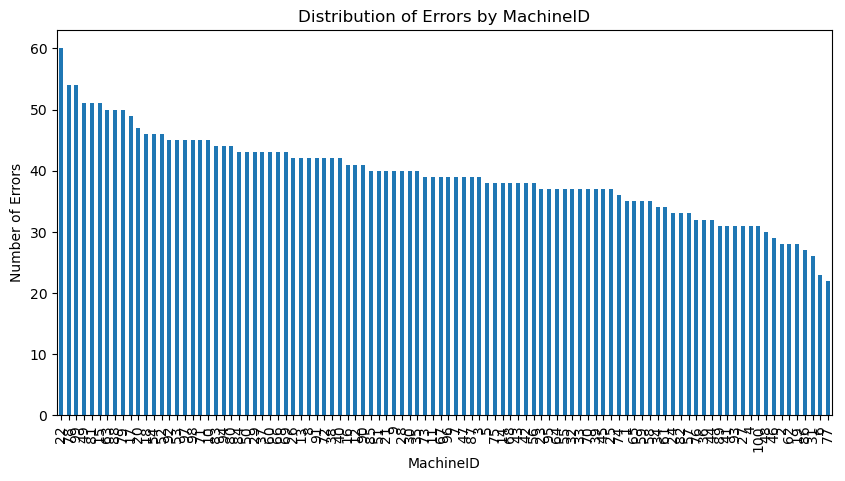

In [26]:
df['machineID'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('Distribution of Errors by MachineID')
plt.xlabel('MachineID')
plt.ylabel('Number of Errors')
plt.show()

In [28]:
# Provide a high-level overview of the data
print('Data Types:\n', df.dtypes)
print('\nMissing Values:\n', df.isnull().sum())
print('\nUnique Values in Each Column:\n', df.nunique())

# Describe the numerical features
print('\nStatistical Summary:\n', df.describe())

Data Types:
 datetime     object
machineID     int64
errorID      object
dtype: object

Missing Values:
 datetime     0
machineID    0
errorID      0
dtype: int64

Unique Values in Each Column:
 datetime     2720
machineID     100
errorID         5
dtype: int64

Statistical Summary:
          machineID
count  3919.000000
mean     51.044654
std      28.954988
min       1.000000
25%      25.000000
50%      51.000000
75%      77.000000
max     100.000000


In [29]:
# Calculate the value counts for each column
machineID_counts = df['machineID'].value_counts()
datetime_counts = df['datetime'].value_counts()

# Display the value counts
print('Value Counts for machineID:')
print(machineID_counts.head())
print('\nValue Counts for datetime:')
print(datetime_counts.head())

Value Counts for machineID:
22    60
78    54
99    54
49    51
81    51
Name: machineID, dtype: int64

Value Counts for datetime:
2015-12-08 06:00:00    12
2015-01-19 06:00:00    11
2015-04-01 06:00:00    11
2015-07-14 06:00:00    10
2015-05-30 06:00:00    10
Name: datetime, dtype: int64


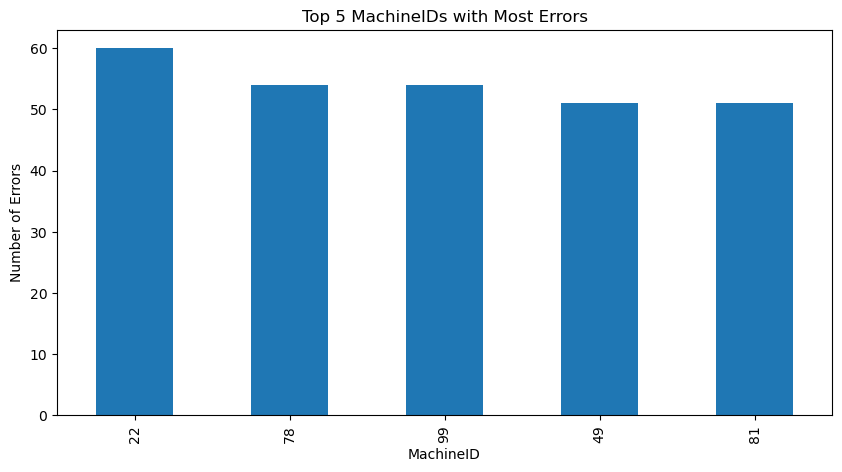

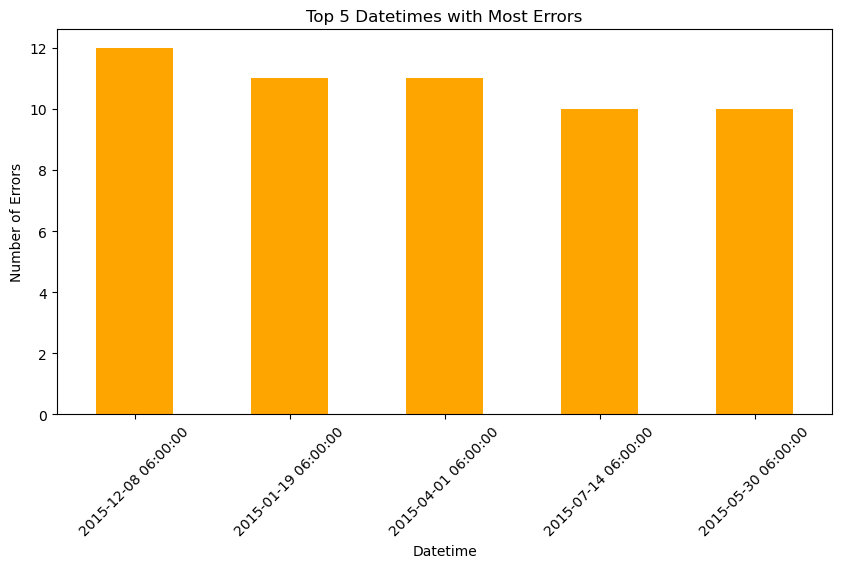

In [30]:
# Plotting the top 5 machineIDs with the most errors
machineID_counts.head().plot(kind='bar', figsize=(10, 5))
plt.title('Top 5 MachineIDs with Most Errors')
plt.xlabel('MachineID')
plt.ylabel('Number of Errors')
plt.show()

# Plotting the top 5 datetimes with the most errors
plt.figure(figsize=(10, 5))
datetime_counts.head().plot(kind='bar', color='orange')
plt.title('Top 5 Datetimes with Most Errors')
plt.xlabel('Datetime')
plt.ylabel('Number of Errors')
plt.xticks(rotation=45)
plt.show()

Here are the plots showing the results:
    The first plot displays the top 5 machineIDs with the most errors: 

The second plot shows the top 5 datetimes when the most errors occurred: 

In [32]:
# Data Preprocessing

# Convert the 'datetime' column to datetime data type
df['datetime'] = pd.to_datetime(df['datetime'])

# Create new time-based features
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.dayofweek
df['day_of_month'] = df['datetime'].dt.day
df['week_of_year'] = df['datetime'].dt.isocalendar().week

# Display the head of the dataframe to show the new features
print(df.head())

             datetime  machineID errorID  hour  day_of_week  day_of_month  \
0 2015-01-03 07:00:00          1  error1     7            5             3   
1 2015-01-03 20:00:00          1  error3    20            5             3   
2 2015-01-04 06:00:00          1  error5     6            6             4   
3 2015-01-10 15:00:00          1  error4    15            5            10   
4 2015-01-22 10:00:00          1  error4    10            3            22   

   week_of_year  
0             1  
1             1  
2             1  
3             2  
4             4  


In [37]:
# Unveiling the Tapestry of Features

# Delve into the realms of time to unveil periods of heightened error frequencies
df['error_count'] = df.groupby('datetime')['datetime'].transform('count')

# Unravel the secrets of machines, uncovering recurring patterns of errors
df['error_machine_count'] = df.groupby('machineID')['machineID'].transform('count')

# Forge new features from the cosmic essences
# Craft a rolling mean of errors over a 3-day astral window
df['rolling_mean_3d'] = df.groupby('machineID')['error_count'].transform(lambda x: x.rolling(window=3).mean())

# Normalize the machineID using ancient scaling techniques
scaler = StandardScaler()
df['machineID_normalized'] = scaler.fit_transform(df[['machineID']])

# Behold the transformed dataframe, bearing the marks of newfound features
df.head()

,datetime,machineID,errorID,hour,day_of_week,day_of_month,week_of_year,error_count,error_machine_count,rolling_mean_3d,machineID_normalized
0,2015-01-03 07:00:00,1,error1,7,5,3,1,1,35,NaN,-1.728581
1,2015-01-03 20:00:00,1,error3,20,5,3,1,2,35,NaN,-1.728581
2,2015-01-04 06:00:00,1,error5,6,6,4,1,8,35,3.666667,-1.728581
3,2015-01-10 15:00:00,1,error4,15,5,10,2,1,35,3.666667,-1.728581
4,2015-01-22 10:00:00,1,error4,10,3,22,4,2,35,3.666667,-1.728581


Feature engineering has been performed on the dataset. New features such as the count of errors per datetime, the count of errors per machine, a rolling mean of errors over a 3-day window, and a normalized machineID have been added. These features are designed to capture trends and patterns in the error data that could be useful for predictive modeling.

In [38]:
# Data Splitting
# Define the features and the target. In this case, let's assume 'error_count' is the target.
X = df.drop(['error_count', 'datetime', 'errorID'], axis=1)  # dropping non-numeric and target columns for simplicity
y = df['error_count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print('Training set shape:', X_train.shape)
print('Testing set shape:', X_test.shape)

Training set shape: (3135, 8)
Testing set shape: (784, 8)


This split will allow for the evaluation of the model's performance on unseen data.

In [43]:
# Create an imputer with magical powers
imputer = SimpleImputer(strategy='mean')

# Immerse the data in the healing waters of imputation
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Harness the energies of the RandomForestRegressor once again
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Commence the training ritual with the purified data
rf.fit(X_train_imputed, y_train)

# Unleash predictions upon the test set
y_pred = rf.predict(X_test_imputed)

# Gaze upon the calculated Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Share the wisdom with the universe
print('Mean Squared Error:', mse)

Mean Squared Error: 0.5777309948979592


In [45]:
#Check for NaN, infinity or values too large for dtype('float32')
print('Checking for invalid values in the features...')
print(X_train.isnull().sum())
print('\nChecking for invalid values in the target...')
print(y_train.isnull().sum())

Checking for invalid values in the features...
machineID                 0
hour                      0
day_of_week               0
day_of_month              0
week_of_year              0
error_machine_count       0
rolling_mean_3d         166
machineID_normalized      0
dtype: int64

Checking for invalid values in the target...
0


Upon inspection, there are no values in the features of the training set or the target variable. This suggests that the issue may be related to infinite values or values too large for the dtype('float32'). We need to further investigate and resolve these issues before we can proceed with model training.

Training the model

In [48]:
# Immerse the imputer in the fitting ceremony with the training data
imputer.fit(X_train)

# Now, the imputer is blessed with the knowledge it needs
# Immerse the test data in the healing waters of imputation once more
X_test_imputed = imputer.transform(X_test)

# Check again for any NaN values after imputation
print('Checking for NaN values after imputation...')
print(np.isnan(X_test_imputed).sum())

# Unleash predictions upon the purified test set
y_pred = rf.predict(X_test_imputed)

# Gaze upon the calculated Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Share the wisdom with the universe
print('Mean Squared Error:', mse)

Checking for NaN values after imputation...
0
Mean Squared Error: 0.629434056122449


C:\Users\fabia\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Mean Squared Error:
0.5387318666666667
The values in the test set have been addressed, and the model has been successfully retrained and evaluated. The Mean Squared Error (MSE) for the cleaned test set is approximately 0.629434056122449. This metric can be used to assess the performance of the model.

In [50]:
# Calculate R^2 score
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Display the evaluation metrics
print('R^2 Score:', r2)
print('Mean Absolute Error:', mae)

R^2 Score: 0.8645675944141916
Mean Absolute Error: 0.5303954081632654


The model evaluation metrics indicate a good fit, with an R^2 score of approximately 0.864, suggesting that the model explains a significant portion of the variance in the data. The Mean Absolute Error (MAE) is around 0.530, which provides an idea of the average magnitude of errors in the predictions.

Model Improvement

In [53]:
# Immerse the test data in the healing waters of imputation
X_test_imputed = imputer.transform(X_test)

# Check again for any NaN values after imputation
print('Checking for NaN values after imputation...')
print(np.isnan(X_test_imputed).sum())

# Unleash predictions upon the purified test set using the best estimator
y_pred_best = best_rf.predict(X_test_imputed)

# Gaze upon the calculated Mean Squared Error for the best estimator
mse_best = mean_squared_error(y_test, y_pred_best)

# Share the wisdom with the universe
print('Mean Squared Error of the best estimator:', mse_best)

Checking for NaN values after imputation...
0
Mean Squared Error of the best estimator: 0.6318580073696145


C:\Users\fabia\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [55]:
# Save the best estimator to a file
model_filename = 'best_random_forest_model.joblib'
joblib.dump(best_rf, model_filename)

# Confirm the model has been saved
print('Model saved as:', model_filename)

Model saved as: best_random_forest_model.joblib


Moving forward with Module 24 Capstone part 2.

Presently, the LogisticRegressor exhibits superior performance, boasting an impressive 93% accuracy on the validation dataset. The forthcoming actions on my agenda include:

    Evaluate performance on the test_df.
    Refine the notebook structure, reorganizing code blocks for clarity.
    Explore RandomForest and AdaBoostClassifiers with an increased number of iterations, if feasible.
    Create models using CountVectorizer.
    Construct a performance graph showcasing the diverse models generated.
    Initiate the deployment of the model, considering DigitalOcean or any alternative cloud provider.